# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

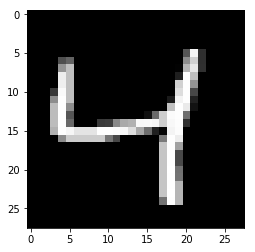

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
img_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, img_size])
targets_ = tf.placeholder(tf.float32, [None, img_size])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, img_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6931
Epoch: 1/20... Training loss: 0.6902
Epoch: 1/20... Training loss: 0.6868
Epoch: 1/20... Training loss: 0.6828
Epoch: 1/20... Training loss: 0.6782
Epoch: 1/20... Training loss: 0.6716
Epoch: 1/20... Training loss: 0.6641
Epoch: 1/20... Training loss: 0.6543
Epoch: 1/20... Training loss: 0.6451
Epoch: 1/20... Training loss: 0.6318
Epoch: 1/20... Training loss: 0.6189
Epoch: 1/20... Training loss: 0.6038
Epoch: 1/20... Training loss: 0.5894
Epoch: 1/20... Training loss: 0.5717
Epoch: 1/20... Training loss: 0.5551
Epoch: 1/20... Training loss: 0.5352
Epoch: 1/20... Training loss: 0.5212
Epoch: 1/20... Training loss: 0.5001
Epoch: 1/20... Training loss: 0.4820
Epoch: 1/20... Training loss: 0.4631
Epoch: 1/20... Training loss: 0.4462
Epoch: 1/20... Training loss: 0.4256
Epoch: 1/20... Training loss: 0.4132
Epoch: 1/20... Training loss: 0.3973
Epoch: 1/20... Training loss: 0.3883
Epoch: 1/20... Training loss: 0.3754
Epoch: 1/20... Training loss: 0.3551
E

Epoch: 1/20... Training loss: 0.1959
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1865
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1817
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1892
E

Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1507
E

Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1306
E

Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1201
E

Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1200
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1192
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1132
E

Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1068
E

Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1038
E

Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1079
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1042
E

Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0930
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1004
E

Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0961
E

Epoch: 9/20... Training loss: 0.1003
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0973
E

Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0997
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0989
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0889
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0999
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0989
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0872
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

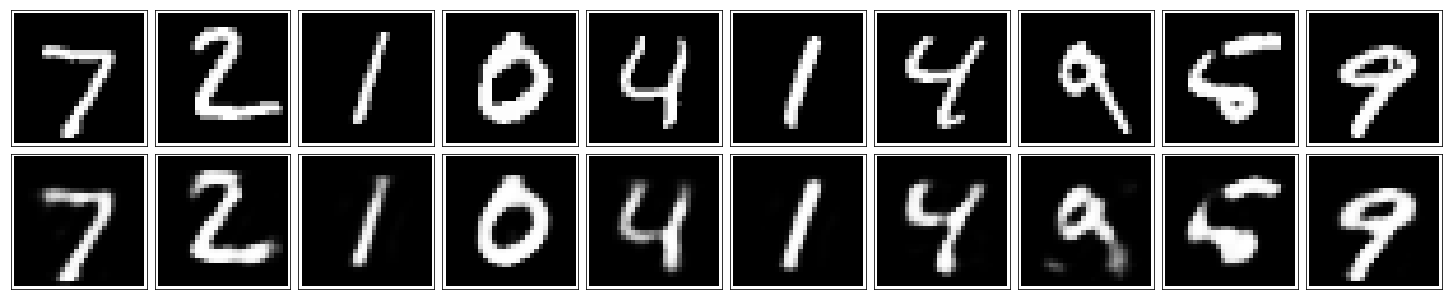

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.